In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

In [16]:
df = pd.read_csv("../../Datasets/DiamondPrices2022.csv", index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [22]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

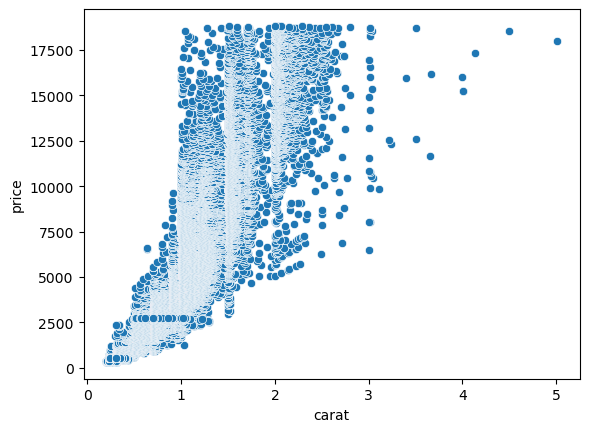

In [24]:
sns.scatterplot(data=df, x='carat',y='price')
plt.show()

In [94]:
X_raw = df['carat'].values.astype('float')
y = df['price'].values.astype('float')

X = np.c_[np.ones(X_raw.shape[0]), X_raw]

In [98]:
def OLS(X, y):
    xtx = np.dot(X.T, X) # we get our X^T * X
    inv_xtx = np.linalg.inv(xtx) # we get (X^TX)^-1, inverse matrix
    xty = np.dot(X.T,y) # we get our X^T * y 
    beta = np.dot(inv_xtx,xty)
    return beta

def predict(X,beta):
    y_hat = np.dot(X, beta)
    return y_hat

beta = OLS(X, y)
print(f"Intercept (b_0): {beta[0]}")
print(f"Slope (b_1): {beta[1]}")

Intercept (b_0): -2256.3950475381134
Slope (b_1): 7756.43615950817


In [112]:
y_hat = predict(X, beta)
residuals = y - y_hat

# print("\nPredictions:")
# for i in range(len(y)):
#     print(f"Carat={X_raw[i]}, Actual={y[i]}, Predicted={y_hat[i]:.2f}, Residual={residuals[i]:.2f}")

def calculate_r_squared(y, y_hat, X):
    n = len(y)  # number of observations
    p = X.shape[1] - 1  # number of predictors (excluding intercept)
    
    # Calculate means
    y_mean = np.mean(y)
    
    # Sum of squares
    ss_res = np.sum((y - y_hat) ** 2)  # SSE (Error)
    ss_tot = np.sum((y - y_mean) ** 2)  # SST (Total)
    ss_reg = ss_tot - ss_res  # SSR (Regression)

    r2 = 1 - (ss_res / ss_tot)
    
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return r2, adj_r2, ss_res, ss_tot, ss_reg

r2, adj_r2, ss_res, ss_tot, ss_reg = calculate_r_squared(y, y_hat, X)

print(r2, adj_r2, ss_res, ss_tot, ss_reg)

0.8493304833200087 0.8493276900919136 129346357989.37387 858477287506.6301 729130929517.2562


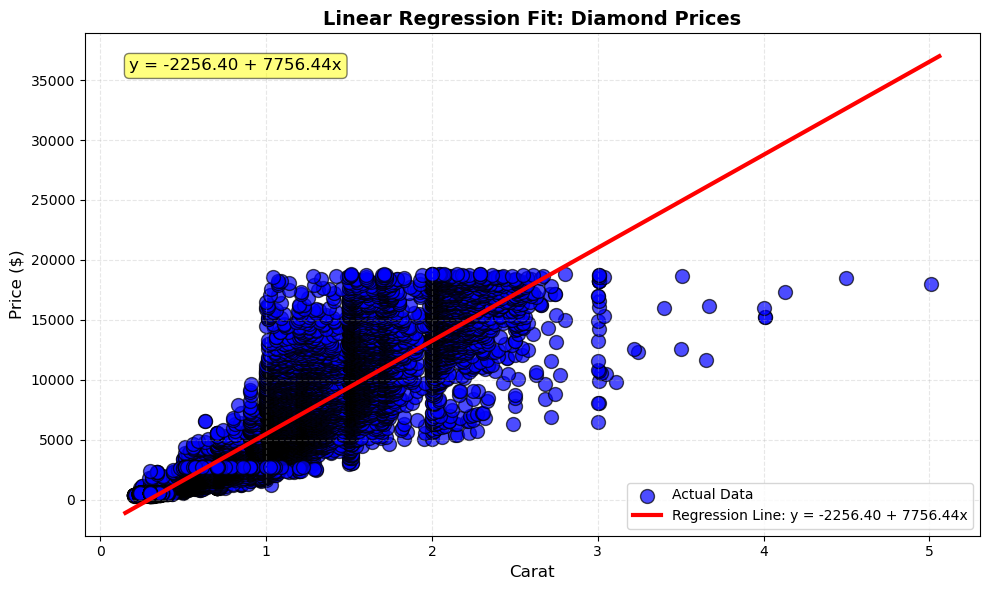

In [102]:
plt.figure(figsize=(10, 6))

plt.scatter(df.carat, df.price, color='blue', s=100, 
           label='Actual Data', alpha=0.7, edgecolors='black')

x_line = np.array([df.carat.min() - 0.05, df.carat.max() + 0.05])
y_line = beta[0] + beta[1] * x_line

plt.plot(x_line, y_line, color='red', linewidth=3, 
         label=f'Regression Line: y = {beta[0]:.2f} + {beta[1]:.2f}x')

plt.xlabel('Carat', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Linear Regression Fit: Diamond Prices', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3, linestyle='--')

equation_text = f'y = {beta[0]:.2f} + {beta[1]:.2f}x'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

In [138]:
class LinearRegression:
    
    def __init__(self):
        self._W = None
        self.training_loss_history = []
        self.is_fitted = False
        
    def predict(self, X):
        """Make predictions using fitted weights"""
        if not self.is_fitted:
            raise ValueError("Model must be fitted before prediction. Call fit() first.")
        return np.dot(X, self._W)
        
    def _compute_loss(self, X, y):
        """Compute MSE loss"""
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        return mse
        
    def _gradient_descent_step(self, X, y, lr):
        """Single gradient descent step"""
        predictions = self.predict(X)
        error = predictions - y
        gradient = np.dot(X.T, error) / len(X)
        self._W -= lr * gradient
        
        # Return current loss for monitoring
        return np.mean(error ** 2)
    
    def fit(self, X, y, n_iter=10000, lr=0.01, verbose=True, tol=1e-6):
        """
        Fit linear regression model using gradient descent
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data with intercept column already added
        y : array-like, shape (n_samples,)
            Target values
        n_iter : int, default=10000
            Maximum number of iterations
        lr : float, default=0.01
            Learning rate
        verbose : bool, default=True
            Whether to print progress
        tol : float, default=1e-6
            Tolerance for early stopping
        """
        # Initialize weights (including bias/intercept)
        self._W = np.zeros(X.shape[1])
        self.is_fitted = True
        
        # Store loss history
        self.training_loss_history = []
        
        # Feature scaling check (optional but recommended)
        if np.max(np.abs(X[:, 1:])) > 10:  # Check non-intercept columns
            print("Warning: Consider feature scaling for faster convergence")
        
        # Gradient descent
        for i in range(n_iter):
            loss = self._gradient_descent_step(X, y, lr)
            self.training_loss_history.append(loss)
            
            # Early stopping
            if len(self.training_loss_history) > 1:
                loss_change = abs(self.training_loss_history[-2] - loss)
                if loss_change < tol:
                    if verbose:
                        print(f"Converged at iteration {i+1} with loss {loss:.6f}")
                    break
            
            # Print progress
            if verbose and (i % 1000 == 0 or i == n_iter-1):
                print(f"Iteration {i+1}/{n_iter}: Loss = {loss:.6f}")
        
        return self
    
    def score(self, X, y):
        """Calculate R-squared score"""
        if not self.is_fitted:
            raise ValueError("Model must be fitted before scoring.")
        
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2
    
    def get_coefficients(self):
        """Return model coefficients"""
        if self._W is None:
            return None
        return self._W.copy()
    
    def plot_training_history(self):
        """Plot loss during training"""
        if not self.training_loss_history:
            print("No training history available.")
            return
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.training_loss_history, linewidth=2)
        plt.xlabel('Iteration', fontsize=12)
        plt.ylabel('Mean Squared Error', fontsize=12)
        plt.title('Training Loss History', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.yscale('log')  # Often better for visualization
        plt.show()

Training without feature scaling:
Iteration 1/2000: Loss = 31380925.237084
Iteration 1001/2000: Loss = 24714120.051894
Iteration 2000/2000: Loss = 19956396.496578

Training with feature scaling:
Iteration 1/2000: Loss = 31380925.237084
Iteration 1001/2000: Loss = 2397834.026718
Converged at iteration 1350 with loss 2397833.972749

Coefficients: [3932.7292562  3676.50072942]
R-squared: 0.8493


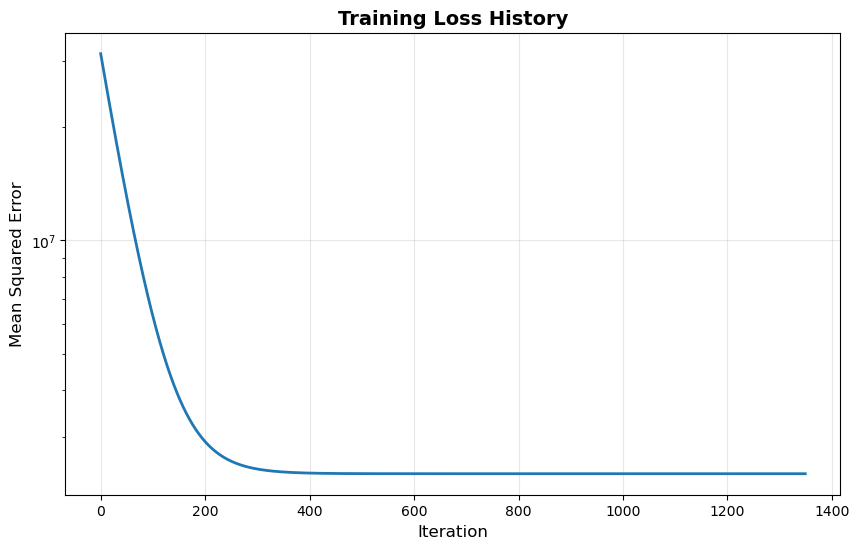


First 5 predictions: [-472.41412574 -627.54265023 -472.41412574   -7.02855228  148.09997221]
First 5 actual: [326. 326. 327. 334. 335.]


In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = np.c_[np.ones(X_raw.shape[0]), scaler.fit_transform(X_raw.reshape(-1, 1))]

# Create and train model
clf = LinearRegression()

# Option 1: Without scaling
print("Training without feature scaling:")
clf.fit(X, y, n_iter=2000, lr=0.0001)  # Smaller LR needed without scaling

# Option 2: With scaling (usually better)
print("\nTraining with feature scaling:")
clf.fit(X_scaled, y, n_iter=2000, lr=0.01)

# Get results
print(f"\nCoefficients: {clf.get_coefficients()}")
print(f"R-squared: {clf.score(X_scaled, y):.4f}")

# Plot training history
clf.plot_training_history()

# Make predictions
predictions = clf.predict(X_scaled)
print(f"\nFirst 5 predictions: {predictions[:5]}")
print(f"First 5 actual: {y[:5]}")